In [1]:
import pandas as pd
df=pd.read_csv('c:/data/soccer/player.csv')
df.columns

Index(['id', 'player_name', 'birthday', 'preferred_foot', 'age', 'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'overall_rating', 'Label'],
      dtype='object')

In [2]:
cols=['age', 'height','weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
X=df[cols]
y=df['Label']
y.value_counts()

1    5705
0    5230
Name: Label, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8748, 39), (2187, 39), (8748,), (2187,))

In [4]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

<AxesSubplot:>

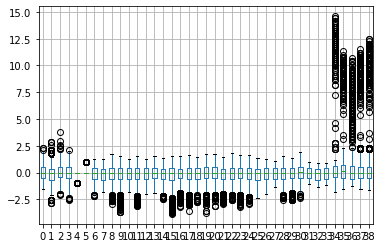

In [10]:
pd.DataFrame(X_test_scaled).boxplot()

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svm=SVC()
n_estimators=10
model=BaggingClassifier(base_estimator=svm,
n_estimators=n_estimators,max_samples=1/n_estimators,n_jobs=-1)
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.9239826245999085
0.9181527206218564


In [6]:
from sklearn.metrics import classification_report
pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1046
           1       0.91      0.93      0.92      1141

    accuracy                           0.92      2187
   macro avg       0.92      0.92      0.92      2187
weighted avg       0.92      0.92      0.92      2187



In [7]:
y_score=model.decision_function(X_test_scaled)
y_score

array([-0.07228578,  2.60690204,  0.86852685, ...,  2.92287773,
       -0.59615694, -0.89090027])

In [8]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_score)

0.9821911124162173

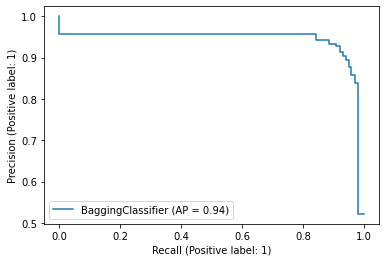

In [9]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test_scaled, y_test)